In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Modern styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

matches = pd.read_csv('../data/raw/matches.csv')
deliveries = pd.read_csv('../data/raw/deliveries.csv')

print("IPL Data Loaded:")
print(f"✅ Matches: {matches.shape}")
print(f"✅ Deliveries: {deliveries.shape}")

IPL Data Loaded:
✅ Matches: (1095, 20)
✅ Deliveries: (260920, 17)


In [19]:
print("=== MATCHES DATASET - First 5 Rows ===")
print(matches.head())
print("\n")

print("=== DELIVERIES DATASET - First 5 Rows ===")
print(deliveries.head())

=== MATCHES DATASET - First 5 Rows ===
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_

In [20]:
print("=== MATCHES DATASET INFO ===")
print(matches.info())
print("\n")

print("=== DELIVERIES DATASET INFO ===")
print(deliveries.info())

=== MATCHES DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null 

In [21]:
print("=== MISSING VALUES IN MATCHES ===")
print(matches.isnull().sum())
print("\n")

print("=== MISSING VALUES IN DELIVERIES ===")
print(deliveries.isnull().sum())

=== MISSING VALUES IN MATCHES ===
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


=== MISSING VALUES IN DELIVERIES ===
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fi

In [22]:
print("=== MATCHES STATISTICS ===")
print(matches.describe())
print("\n")

print("=== DELIVERIES STATISTICS ===")
print(deliveries.describe())

=== MATCHES STATISTICS ===
                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000


=== DELIVERIES STATISTICS ===
           match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.

# Key Observations:
Matches Dataset (1,095 matches):

    1. Clean data overall - minimal missing values
    2. Missing: 51 cities, 5 winners/players of match (likely no results), 1,074 methods (normal - only used for DLS)
    3. Covers multiple IPL seasons
    4. Has toss info, venue, teams, results, margins

Deliveries Dataset (260,920 ball-by-ball records):

    1. Core data is complete (batting_team, bowler, batter, runs, wickets)
    2. Missing values are expected (extras_type only when extras, dismissals only when wickets)
    3. Average ~1.27 runs per ball
    4. ~5% wicket rate per ball

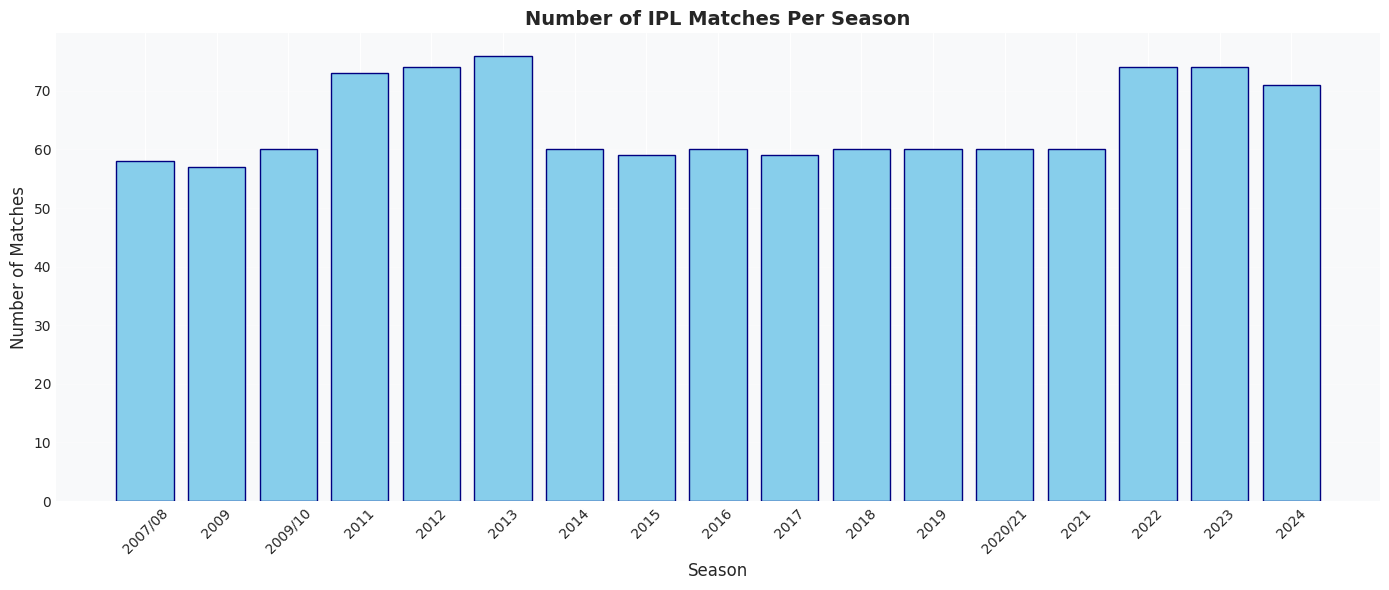

Total Seasons: 17
Average matches per season: 64.4


In [23]:
# 1. Matches per Season
plt.figure(figsize=(14, 6))
matches_per_season = matches['season'].value_counts().sort_index()
plt.bar(matches_per_season.index, matches_per_season.values, color='skyblue', edgecolor='navy')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Number of IPL Matches Per Season', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/matches_per_season.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total Seasons: {matches['season'].nunique()}")
print(f"Average matches per season: {matches_per_season.mean():.1f}")

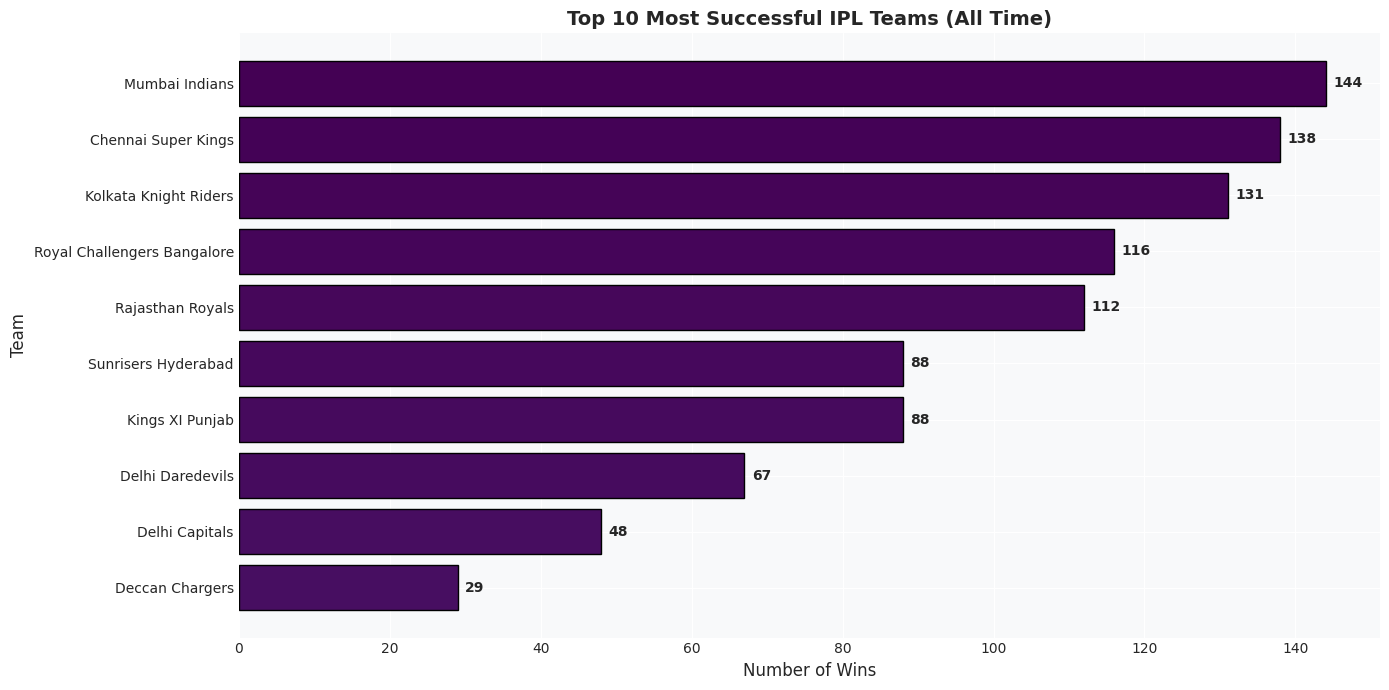


=== Top 5 Teams ===
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Name: count, dtype: int64


In [24]:
# 2. Most Successful Teams (by wins)
plt.figure(figsize=(14, 7))
team_wins = matches['winner'].value_counts().head(10)
colors = plt.cm.viridis(range(len(team_wins)))
plt.barh(team_wins.index, team_wins.values, color=colors, edgecolor='black')
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Top 10 Most Successful IPL Teams (All Time)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest at top

# Add value labels on bars
for i, v in enumerate(team_wins.values):
    plt.text(v + 1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/top_teams_by_wins.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Top 5 Teams ===")
print(team_wins.head())

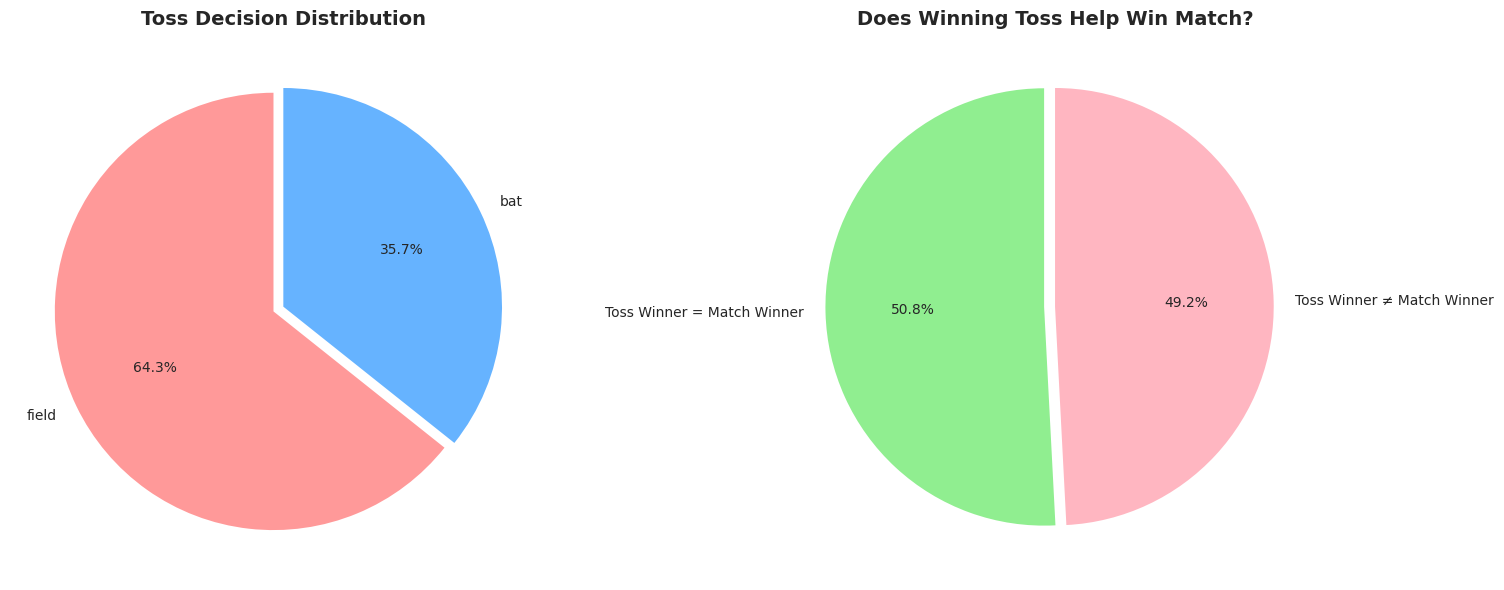


✅ Toss winners also win match: 50.8% of the time


In [25]:
# 3. Toss Decision Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Toss decisions distribution
toss_decisions = matches['toss_decision'].value_counts()
axes[0].pie(toss_decisions.values, labels=toss_decisions.index, autopct='%1.1f%%', 
            startangle=90, colors=['#ff9999', '#66b3ff'], explode=(0.05, 0))
axes[0].set_title('Toss Decision Distribution', fontsize=14, fontweight='bold')

# Toss winner vs Match winner
matches_clean = matches.dropna(subset=['winner'])
toss_match_win = (matches_clean['toss_winner'] == matches_clean['winner']).value_counts()
labels = ['Toss Winner = Match Winner', 'Toss Winner ≠ Match Winner']
axes[1].pie(toss_match_win.values, labels=labels, autopct='%1.1f%%', 
            startangle=90, colors=['#90EE90', '#FFB6C1'], explode=(0.05, 0))
axes[1].set_title('Does Winning Toss Help Win Match?', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/toss_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

toss_win_percentage = (toss_match_win[True] / toss_match_win.sum()) * 100
print(f"\n✅ Toss winners also win match: {toss_win_percentage:.1f}% of the time")

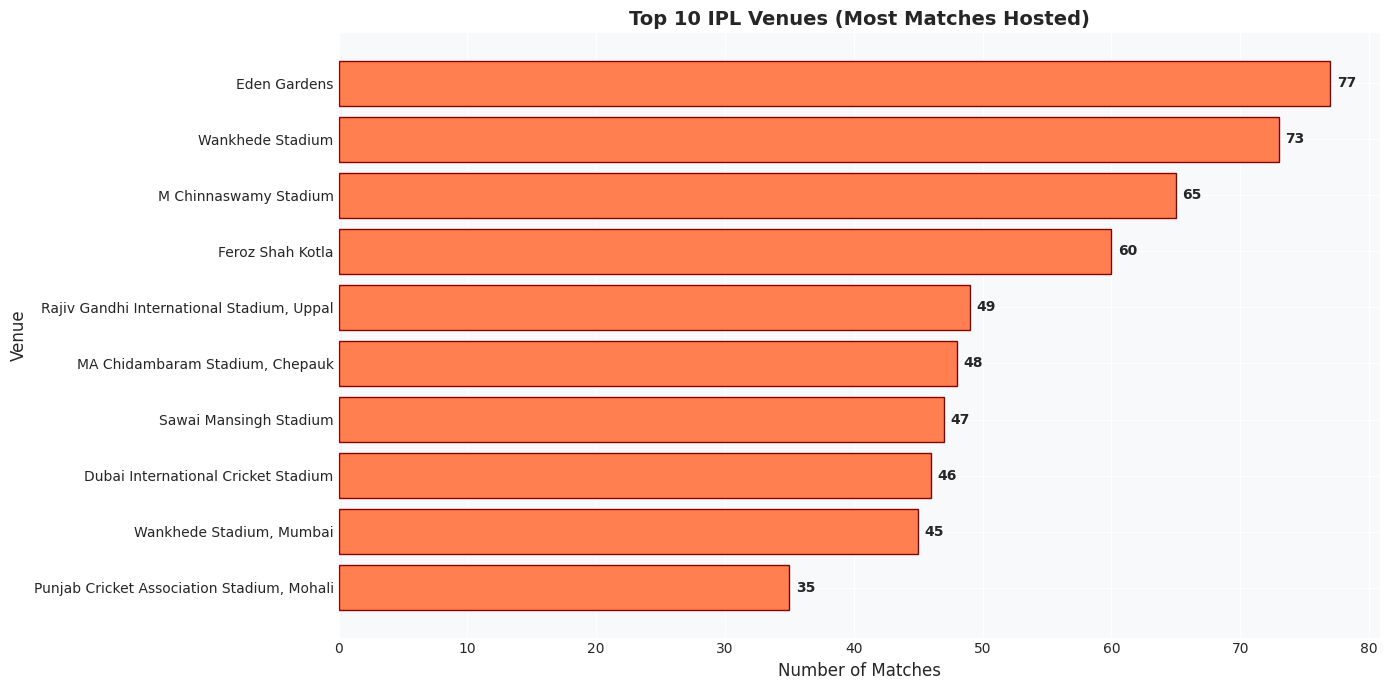


=== Top 5 Venues ===
venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64


In [26]:
# 4. Top Venues by Number of Matches
plt.figure(figsize=(14, 7))
top_venues = matches['venue'].value_counts().head(10)
plt.barh(top_venues.index, top_venues.values, color='coral', edgecolor='darkred')
plt.xlabel('Number of Matches', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.title('Top 10 IPL Venues (Most Matches Hosted)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_venues.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/top_venues.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Top 5 Venues ===")
print(top_venues.head())

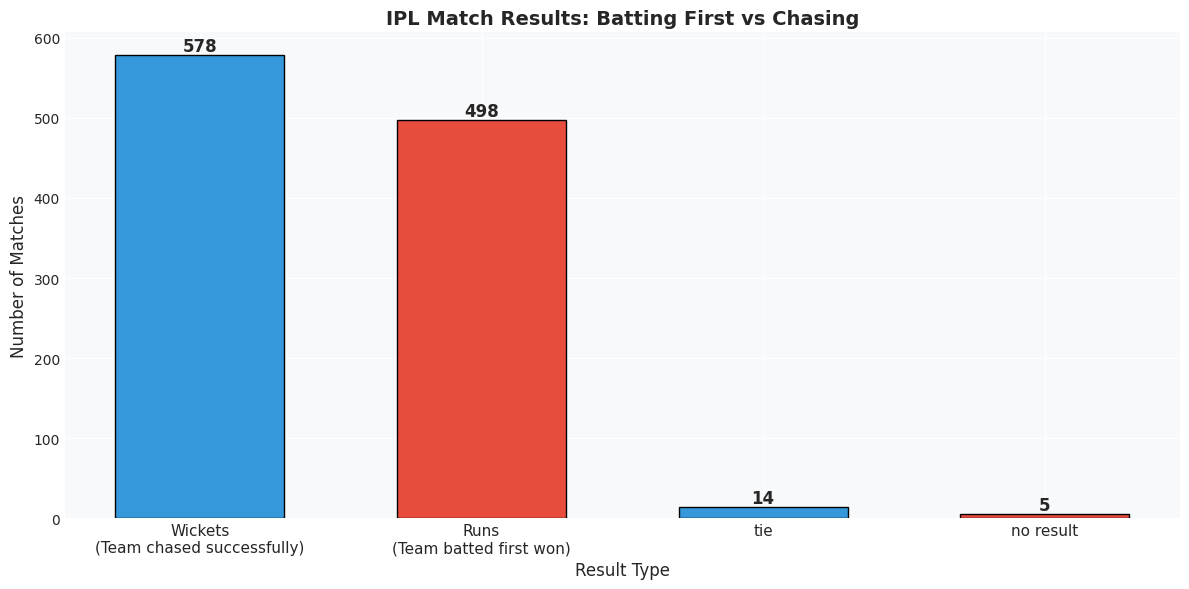


=== Result Distribution ===
result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

📊 Insight:
   • Batting first wins: 498 matches (45.5%)
   • Chasing wins: 578 matches (52.8%)

✅ Chasing has been more successful in IPL!


In [27]:
# 5. Result Type Distribution (runs vs wickets) - Enhanced
plt.figure(figsize=(12, 6))
result_type = matches['result'].value_counts()

# Create labels that explain the context
labels = []
for result in result_type.index:
    if result == 'runs':
        labels.append('Runs\n(Team batted first won)')
    elif result == 'wickets':
        labels.append('Wickets\n(Team chased successfully)')
    else:
        labels.append(result)

plt.bar(range(len(result_type)), result_type.values, color=['#3498db', '#e74c3c'], 
        edgecolor='black', width=0.6)
plt.xlabel('Result Type', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('IPL Match Results: Batting First vs Chasing', fontsize=14, fontweight='bold')
plt.xticks(range(len(result_type)), labels, fontsize=11)

# Add value labels on bars
for i, v in enumerate(result_type.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('../reports/figures/result_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Result Distribution ===")
print(result_type)
print(f"\n📊 Insight:")
print(f"   • Batting first wins: {result_type.get('runs', 0)} matches ({result_type.get('runs', 0)/result_type.sum()*100:.1f}%)")
print(f"   • Chasing wins: {result_type.get('wickets', 0)} matches ({result_type.get('wickets', 0)/result_type.sum()*100:.1f}%)")

# Calculate which strategy is better
if result_type.get('runs', 0) > result_type.get('wickets', 0):
    print(f"\n✅ Batting first has been more successful in IPL!")
else:
    print(f"\n✅ Chasing has been more successful in IPL!")

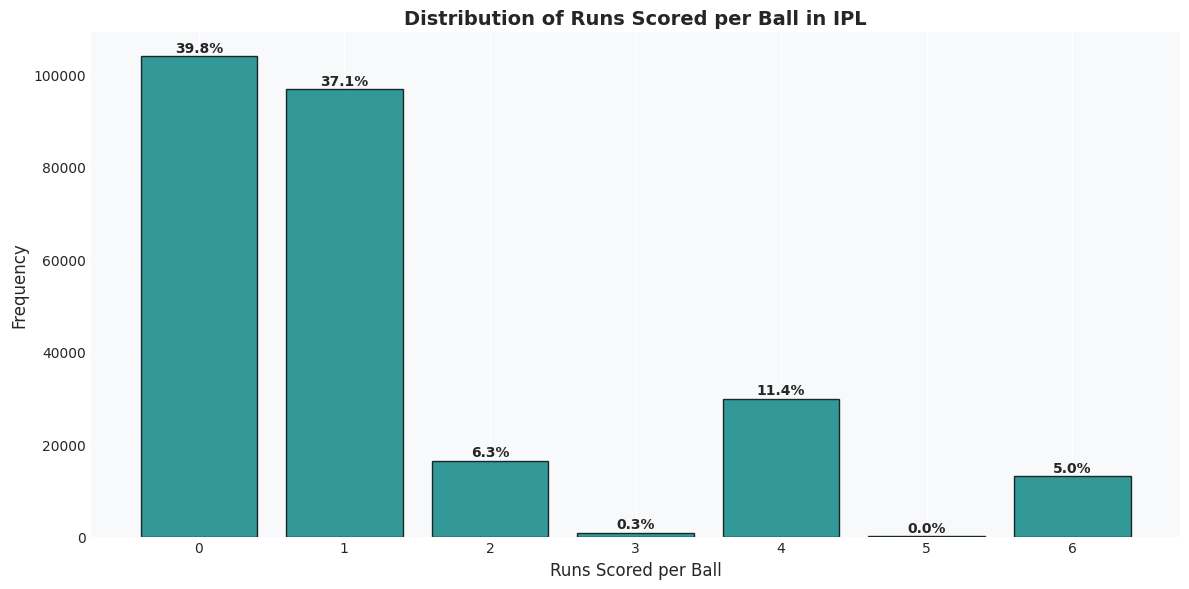


=== Runs per Ball Statistics ===
batsman_runs
0    103940
1     96778
2     16453
3       783
4     29850
5        65
6     13051
Name: count, dtype: int64

Dot balls percentage: 39.8%
Boundaries (4s & 6s) percentage: 16.4%


In [28]:
# 7. Runs per Ball Distribution
plt.figure(figsize=(12, 6))
runs_distribution = deliveries['batsman_runs'].value_counts().sort_index()
plt.bar(runs_distribution.index, runs_distribution.values, color='teal', 
        edgecolor='black', alpha=0.8)
plt.xlabel('Runs Scored per Ball', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Runs Scored per Ball in IPL', fontsize=14, fontweight='bold')
plt.xticks(range(7))
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
total_balls = runs_distribution.sum()
for i, v in enumerate(runs_distribution.values):
    percentage = (v / total_balls) * 100
    plt.text(i, v + 1000, f'{percentage:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/runs_per_ball_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Runs per Ball Statistics ===")
print(runs_distribution)
print(f"\nDot balls percentage: {(runs_distribution[0] / total_balls * 100):.1f}%")
print(f"Boundaries (4s & 6s) percentage: {((runs_distribution[4] + runs_distribution[6]) / total_balls * 100):.1f}%")

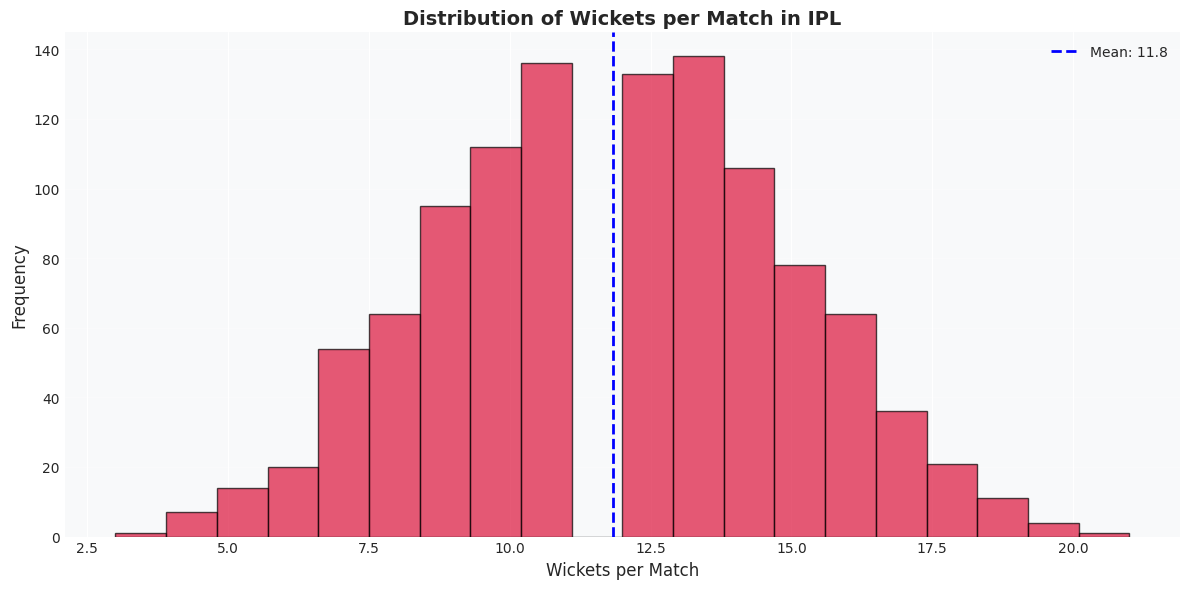


=== Wickets per Match Statistics ===
Average wickets per match: 11.8
Median wickets per match: 12.0
Max wickets in a match: 21


In [29]:
# 8. Wickets per Match Analysis
wickets_per_match = deliveries.groupby('match_id')['is_wicket'].sum()

plt.figure(figsize=(12, 6))
plt.hist(wickets_per_match, bins=20, color='crimson', edgecolor='black', alpha=0.7)
plt.xlabel('Wickets per Match', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Wickets per Match in IPL', fontsize=14, fontweight='bold')
plt.axvline(wickets_per_match.mean(), color='blue', linestyle='--', 
            linewidth=2, label=f'Mean: {wickets_per_match.mean():.1f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/wickets_per_match_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== Wickets per Match Statistics ===")
print(f"Average wickets per match: {wickets_per_match.mean():.1f}")
print(f"Median wickets per match: {wickets_per_match.median():.1f}")
print(f"Max wickets in a match: {wickets_per_match.max():.0f}")

In [ ]:
# 9. Create Summary Report
print("="*60)
print("IPL DATA EXPLORATION - SUMMARY REPORT")
print("="*60)

print("\n DATASET OVERVIEW")
print(f"Total Matches: {len(matches)}")
print(f"Total Balls Bowled: {len(deliveries)}")
print(f"Seasons Covered: {matches['season'].nunique()}")
print(f"Unique Teams: {matches['team1'].nunique()}")
print(f"Unique Venues: {matches['venue'].nunique()}")
print(f"Unique Players (Batsmen): {deliveries['batter'].nunique()}")
print(f"Unique Players (Bowlers): {deliveries['bowler'].nunique()}")

print("\n KEY INSIGHTS")
print(f"Most Successful Team: {matches['winner'].value_counts().index[0]} ({matches['winner'].value_counts().values[0]} wins)")
print(f"Most Hosted Venue: {matches['venue'].value_counts().index[0]} ({matches['venue'].value_counts().values[0]} matches)")
print(f"Toss Win = Match Win Rate: {toss_win_percentage:.1f}%")
print(f"Average Target Score: {matches['target_runs'].mean():.1f} runs")
print(f"Average Wickets per Match: {wickets_per_match.mean():.1f}")
print(f"Dot Ball Percentage: {(runs_distribution[0] / total_balls * 100):.1f}%")
print(f"Boundary Percentage: {((runs_distribution[4] + runs_distribution[6]) / total_balls * 100):.1f}%")

IPL DATA EXPLORATION - SUMMARY REPORT

📊 DATASET OVERVIEW
Total Matches: 1095
Total Balls Bowled: 260920
Seasons Covered: 17
Unique Teams: 19
Unique Venues: 58
Unique Players (Batsmen): 673
Unique Players (Bowlers): 530

🏆 KEY INSIGHTS
Most Successful Team: Mumbai Indians (144 wins)
Most Hosted Venue: Eden Gardens (77 matches)
Toss Win = Match Win Rate: 50.8%
Average Target Score: 165.7 runs
Average Wickets per Match: 11.8
Dot Ball Percentage: 39.8%
Boundary Percentage: 16.4%



🧡 ORANGE CAP HOLDERS (Most Runs per Season)
 season        batter                        team  total_runs  matches_played
2007/08      SE Marsh             Kings XI Punjab         616              11
   2009     ML Hayden         Chennai Super Kings         572              12
2009/10  SR Tendulkar              Mumbai Indians         618              15
   2011      CH Gayle Royal Challengers Bangalore         608              12
   2012      CH Gayle Royal Challengers Bangalore         733              14
   2013    MEK Hussey         Chennai Super Kings         733              17
   2014    RV Uthappa       Kolkata Knight Riders         660              16
   2015     DA Warner         Sunrisers Hyderabad         562              14
   2016       V Kohli Royal Challengers Bangalore         973              16
   2017     DA Warner         Sunrisers Hyderabad         641              14
   2018 KS Williamson         Sunrisers Hyderabad         735              17
   2019     DA Warn

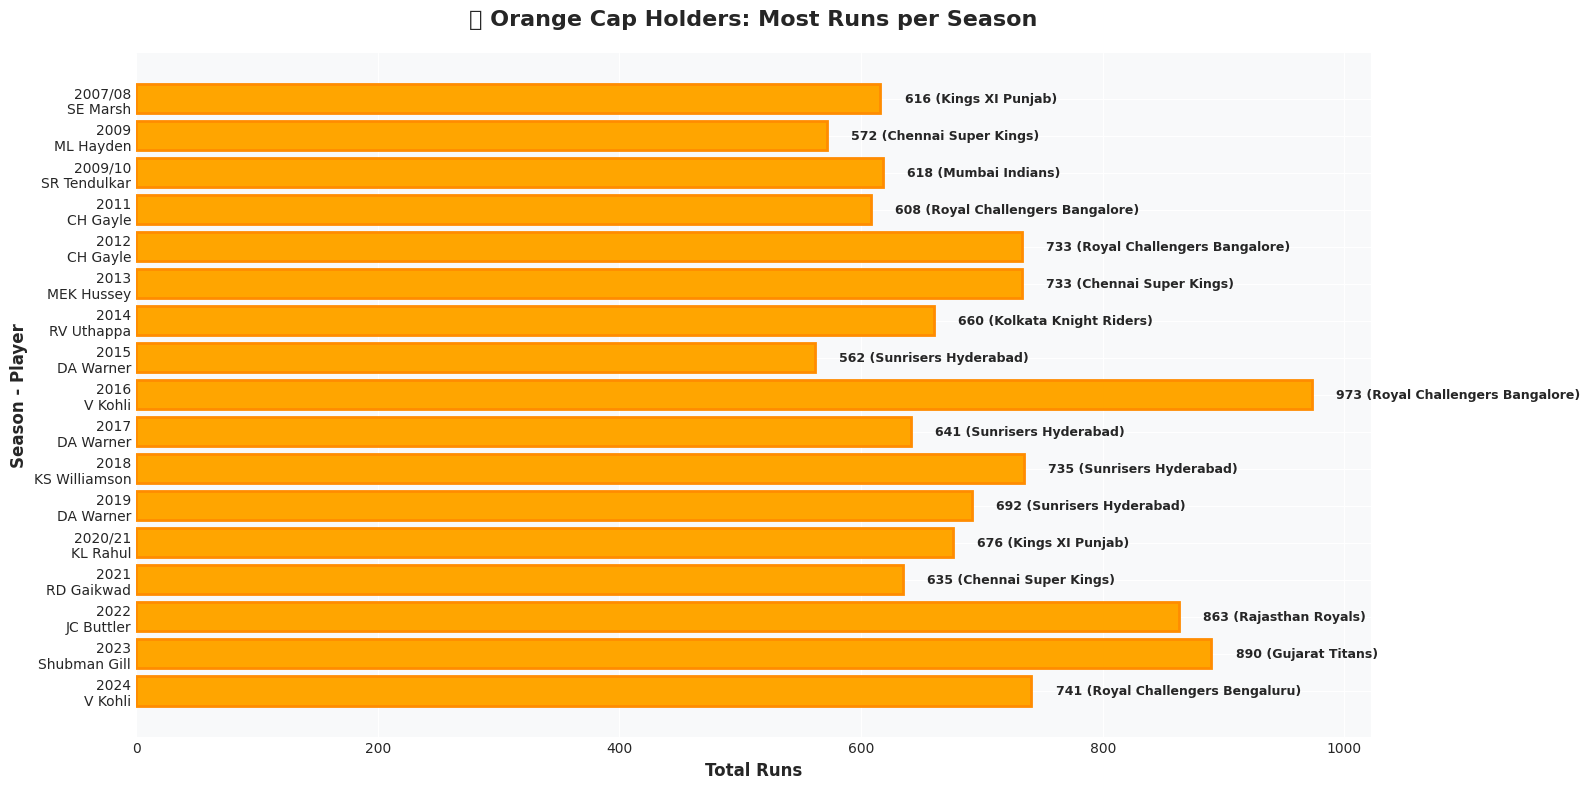

In [32]:
# 11. Orange Cap Holders - Most Runs per Season
print("\n" + "="*80)
print("🧡 ORANGE CAP HOLDERS (Most Runs per Season)")
print("="*80)

# Calculate runs per player per season
# First, merge deliveries with matches to get season info
deliveries_with_season = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Group by season and batter
season_runs = deliveries_with_season.groupby(['season', 'batter']).agg({
    'batsman_runs': 'sum',
    'match_id': 'nunique'  # matches played
}).reset_index()
season_runs.columns = ['season', 'batter', 'total_runs', 'matches_played']

# Get top scorer for each season
orange_cap = season_runs.loc[season_runs.groupby('season')['total_runs'].idxmax()].reset_index(drop=True)

# Get the team for each player (most frequent team they played for that season)
def get_player_team(season, player):
    player_teams = deliveries_with_season[
        (deliveries_with_season['season'] == season) & 
        (deliveries_with_season['batter'] == player)
    ]['batting_team'].mode()
    return player_teams.values[0] if len(player_teams) > 0 else 'Unknown'

orange_cap['team'] = orange_cap.apply(lambda x: get_player_team(x['season'], x['batter']), axis=1)
orange_cap = orange_cap.sort_values('season')

print(orange_cap[['season', 'batter', 'team', 'total_runs', 'matches_played']].to_string(index=False))

# Visualize
plt.figure(figsize=(16, 8))
plt.barh(orange_cap['season'].astype(str) + '\n' + orange_cap['batter'], 
         orange_cap['total_runs'], 
         color='orange', edgecolor='darkorange', linewidth=2)
plt.xlabel('Total Runs', fontsize=12, fontweight='bold')
plt.ylabel('Season - Player', fontsize=12, fontweight='bold')
plt.title('🧡 Orange Cap Holders: Most Runs per Season', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (runs, team) in enumerate(zip(orange_cap['total_runs'], orange_cap['team'])):
    plt.text(runs + 20, i, f'{runs} ({team})', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/orange_cap_holders.png', dpi=300, bbox_inches='tight')
plt.show()


💜 PURPLE CAP HOLDERS (Most Wickets per Season)
 season        bowler                        team  total_wickets  matches_played
2007/08 Sohail Tanvir            Rajasthan Royals             24              11
   2009      RP Singh             Deccan Chargers             26              16
2009/10       PP Ojha             Deccan Chargers             22              16
   2011    SL Malinga              Mumbai Indians             30              16
   2012      M Morkel            Delhi Daredevils             30              16
   2013      DJ Bravo         Chennai Super Kings             34              18
   2014     MM Sharma         Chennai Super Kings             26              16
   2015      DJ Bravo         Chennai Super Kings             28              16
   2016       B Kumar         Sunrisers Hyderabad             24              17
   2017       B Kumar         Sunrisers Hyderabad             28              14
   2018        AJ Tye             Kings XI Punjab            

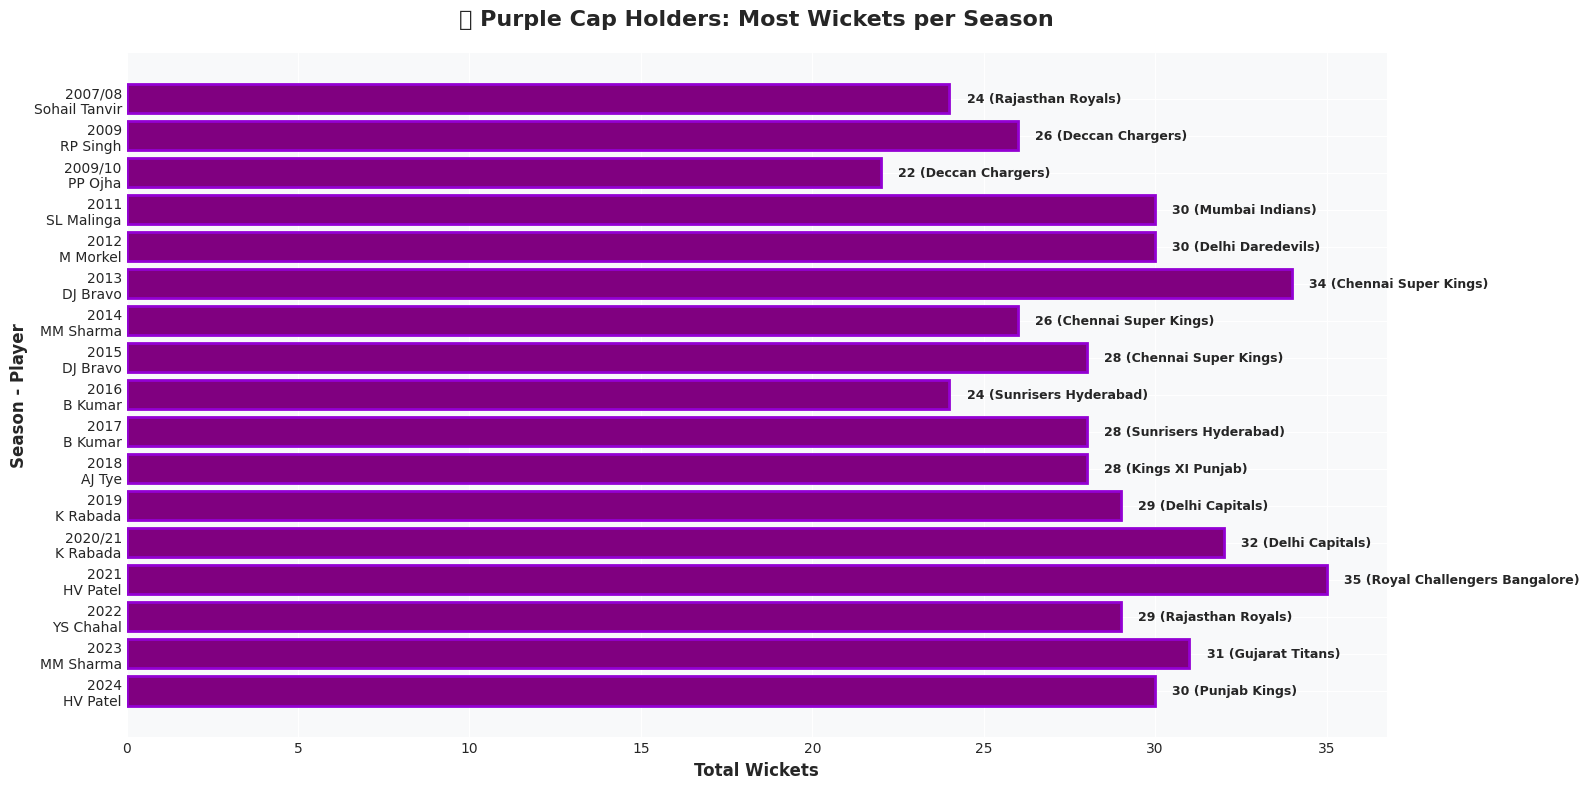

In [33]:
# 12. Purple Cap Holders - Most Wickets per Season
print("\n" + "="*80)
print("💜 PURPLE CAP HOLDERS (Most Wickets per Season)")
print("="*80)

# Group by season and bowler
season_wickets = deliveries_with_season.groupby(['season', 'bowler']).agg({
    'is_wicket': 'sum',
    'match_id': 'nunique'  # matches played
}).reset_index()
season_wickets.columns = ['season', 'bowler', 'total_wickets', 'matches_played']

# Get top wicket-taker for each season
purple_cap = season_wickets.loc[season_wickets.groupby('season')['total_wickets'].idxmax()].reset_index(drop=True)

# Get the team for each player
def get_bowler_team(season, player):
    player_teams = deliveries_with_season[
        (deliveries_with_season['season'] == season) & 
        (deliveries_with_season['bowler'] == player)
    ]['bowling_team'].mode()
    return player_teams.values[0] if len(player_teams) > 0 else 'Unknown'

purple_cap['team'] = purple_cap.apply(lambda x: get_bowler_team(x['season'], x['bowler']), axis=1)
purple_cap = purple_cap.sort_values('season')

print(purple_cap[['season', 'bowler', 'team', 'total_wickets', 'matches_played']].to_string(index=False))

# Visualize
plt.figure(figsize=(16, 8))
plt.barh(purple_cap['season'].astype(str) + '\n' + purple_cap['bowler'], 
         purple_cap['total_wickets'], 
         color='purple', edgecolor='darkviolet', linewidth=2)
plt.xlabel('Total Wickets', fontsize=12, fontweight='bold')
plt.ylabel('Season - Player', fontsize=12, fontweight='bold')
plt.title('💜 Purple Cap Holders: Most Wickets per Season', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (wickets, team) in enumerate(zip(purple_cap['total_wickets'], purple_cap['team'])):
    plt.text(wickets + 0.5, i, f'{wickets} ({team})', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/purple_cap_holders.png', dpi=300, bbox_inches='tight')
plt.show()


⚡ MOST SIXES PER SEASON
 season          batter                        team  total_sixes  matches_played
2007/08   ST Jayasuriya              Mumbai Indians           31              10
   2009    AC Gilchrist             Deccan Chargers           29              11
2009/10      RV Uthappa Royal Challengers Bangalore           27              11
   2011        CH Gayle Royal Challengers Bangalore           44              10
   2012        CH Gayle Royal Challengers Bangalore           59              12
   2013        CH Gayle Royal Challengers Bangalore           52              13
   2014      GJ Maxwell             Kings XI Punjab           36               9
   2015        CH Gayle Royal Challengers Bangalore           38              12
   2016         V Kohli Royal Challengers Bangalore           38              10
   2017       DA Warner         Sunrisers Hyderabad           26              10
   2018         RR Pant            Delhi Daredevils           37              10
   

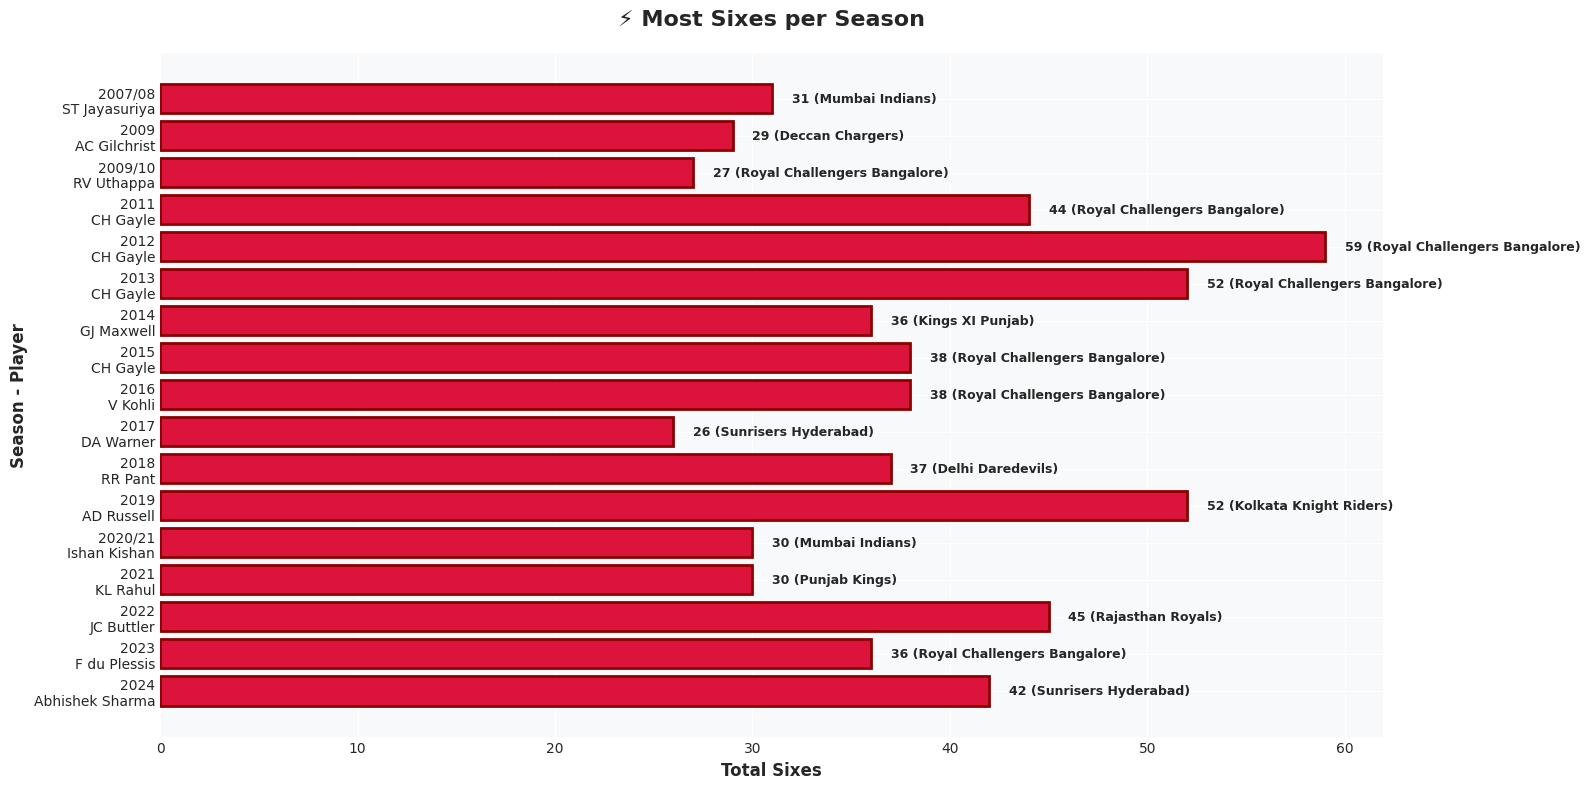

In [34]:
# 13. Most Sixes per Season
print("\n" + "="*80)
print("⚡ MOST SIXES PER SEASON")
print("="*80)

# Filter only sixes
season_sixes = deliveries_with_season[deliveries_with_season['batsman_runs'] == 6].groupby(['season', 'batter']).agg({
    'batsman_runs': 'count',  # count of sixes
    'match_id': 'nunique'
}).reset_index()
season_sixes.columns = ['season', 'batter', 'total_sixes', 'matches_played']

# Get player with most sixes for each season
most_sixes = season_sixes.loc[season_sixes.groupby('season')['total_sixes'].idxmax()].reset_index(drop=True)

# Get team
most_sixes['team'] = most_sixes.apply(lambda x: get_player_team(x['season'], x['batter']), axis=1)
most_sixes = most_sixes.sort_values('season')

print(most_sixes[['season', 'batter', 'team', 'total_sixes', 'matches_played']].to_string(index=False))

# Visualize
plt.figure(figsize=(16, 8))
plt.barh(most_sixes['season'].astype(str) + '\n' + most_sixes['batter'], 
         most_sixes['total_sixes'], 
         color='crimson', edgecolor='darkred', linewidth=2)
plt.xlabel('Total Sixes', fontsize=12, fontweight='bold')
plt.ylabel('Season - Player', fontsize=12, fontweight='bold')
plt.title('⚡ Most Sixes per Season', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (sixes, team) in enumerate(zip(most_sixes['total_sixes'], most_sixes['team'])):
    plt.text(sixes + 1, i, f'{sixes} ({team})', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/most_sixes_per_season.png', dpi=300, bbox_inches='tight')
plt.show()


🚀 HIGHEST STRIKE RATE PER SEASON (Min 250 runs)
 season          batter                        team  total_runs  balls_faced  strike_rate
2007/08        V Sehwag            Delhi Daredevils         406          229   177.292576
   2009    AC Gilchrist             Deccan Chargers         495          337   146.884273
2009/10      KA Pollard              Mumbai Indians         273          152   179.605263
   2011        CH Gayle Royal Challengers Bangalore         608          342   177.777778
   2012       DA Warner            Delhi Daredevils         256          161   159.006211
   2013  AB de Villiers Royal Challengers Bangalore         373          226   165.044248
   2014      GJ Maxwell             Kings XI Punjab         552          312   176.923077
   2015      AD Russell       Kolkata Knight Riders         326          175   186.285714
   2016  AB de Villiers Royal Challengers Bangalore         687          415   165.542169
   2017         CA Lynn       Kolkata Knight Riders

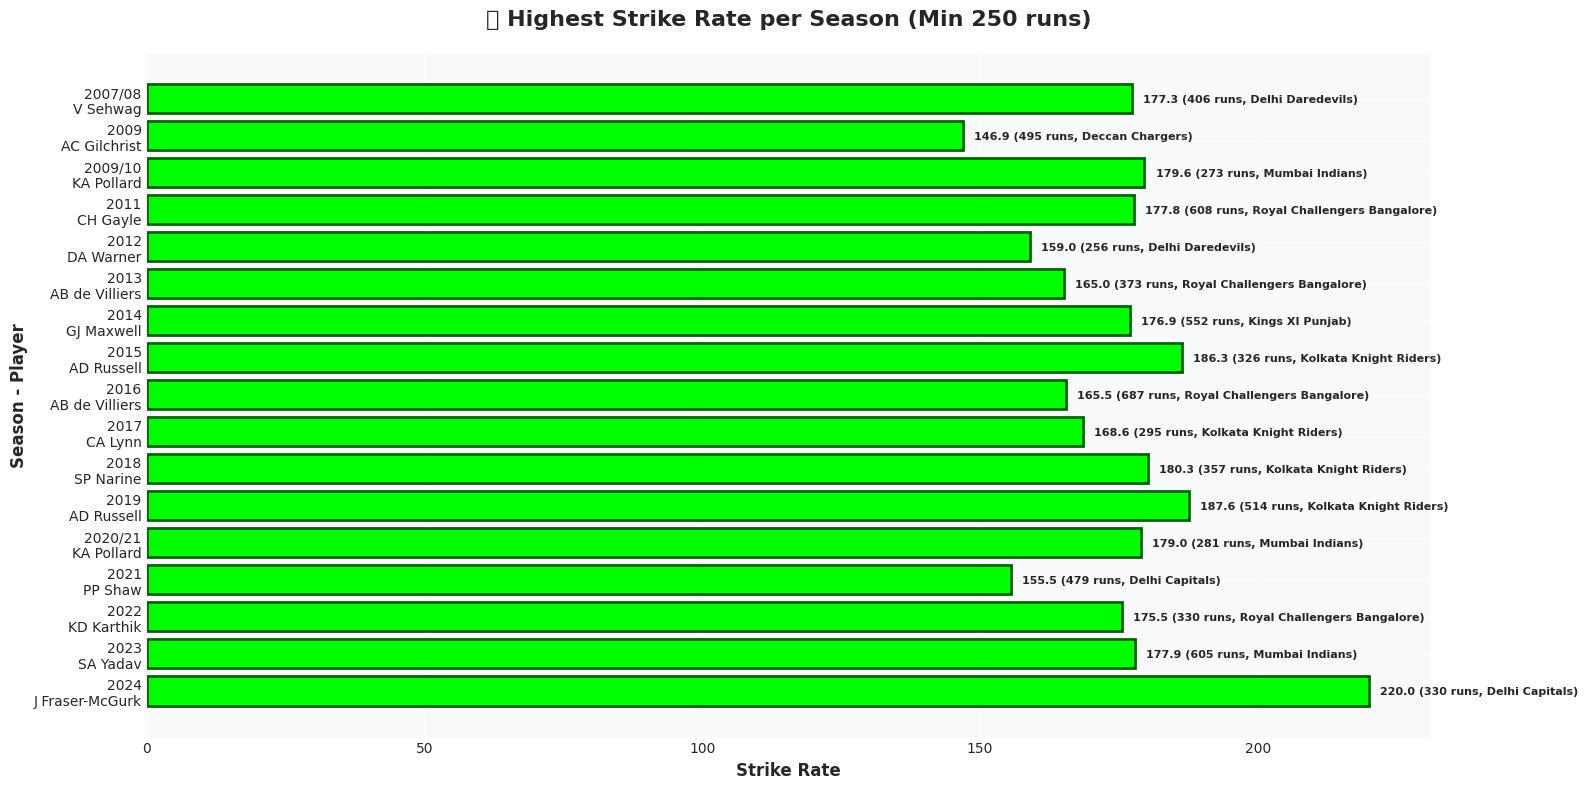

In [35]:
# 14. Highest Strike Rate per Season (min 250 runs)
print("\n" + "="*80)
print("🚀 HIGHEST STRIKE RATE PER SEASON (Min 250 runs)")
print("="*80)

# Calculate balls faced and runs for strike rate
season_sr = deliveries_with_season.groupby(['season', 'batter']).agg({
    'batsman_runs': 'sum',
    'ball': 'count'  # balls faced
}).reset_index()
season_sr.columns = ['season', 'batter', 'total_runs', 'balls_faced']

# Calculate strike rate
season_sr['strike_rate'] = (season_sr['total_runs'] / season_sr['balls_faced']) * 100

# Filter players with at least 250 runs
season_sr_filtered = season_sr[season_sr['total_runs'] >= 250]

# Get highest strike rate for each season
highest_sr = season_sr_filtered.loc[season_sr_filtered.groupby('season')['strike_rate'].idxmax()].reset_index(drop=True)

# Get team
highest_sr['team'] = highest_sr.apply(lambda x: get_player_team(x['season'], x['batter']), axis=1)
highest_sr = highest_sr.sort_values('season')

print(highest_sr[['season', 'batter', 'team', 'total_runs', 'balls_faced', 'strike_rate']].to_string(index=False))

# Visualize
plt.figure(figsize=(16, 8))
plt.barh(highest_sr['season'].astype(str) + '\n' + highest_sr['batter'], 
         highest_sr['strike_rate'], 
         color='lime', edgecolor='darkgreen', linewidth=2)
plt.xlabel('Strike Rate', fontsize=12, fontweight='bold')
plt.ylabel('Season - Player', fontsize=12, fontweight='bold')
plt.title('🚀 Highest Strike Rate per Season (Min 250 runs)', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (sr, runs, team) in enumerate(zip(highest_sr['strike_rate'], highest_sr['total_runs'], highest_sr['team'])):
    plt.text(sr + 2, i, f'{sr:.1f} ({runs} runs, {team})', va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.savefig('../reports/figures/highest_strike_rate_per_season.png', dpi=300, bbox_inches='tight')
plt.show()


🎯 MOST ECONOMICAL BOWLER PER SEASON (Min 40 overs)
 season            bowler                  team  overs_bowled  runs_conceded  economy_rate
2007/08     Sohail Tanvir      Rajasthan Royals     44.166667            275      6.226415
   2009    M Muralitharan   Chennai Super Kings     50.666667            267      5.269737
2009/10          R Ashwin   Chennai Super Kings     49.500000            308      6.222222
   2011          R Sharma         Pune Warriors     50.333333            278      5.523179
   2012         SP Narine Kolkata Knight Riders     59.500000            332      5.579832
   2013         SP Narine Kolkata Knight Riders     64.500000            353      5.472868
   2014          AR Patel       Kings XI Punjab     67.166667            424      6.312655
   2015          R Ashwin   Chennai Super Kings     40.000000            229      5.725000
   2016 Mustafizur Rahman   Sunrisers Hyderabad     62.666667            427      6.813830
   2017   Harbhajan Singh        Mumba

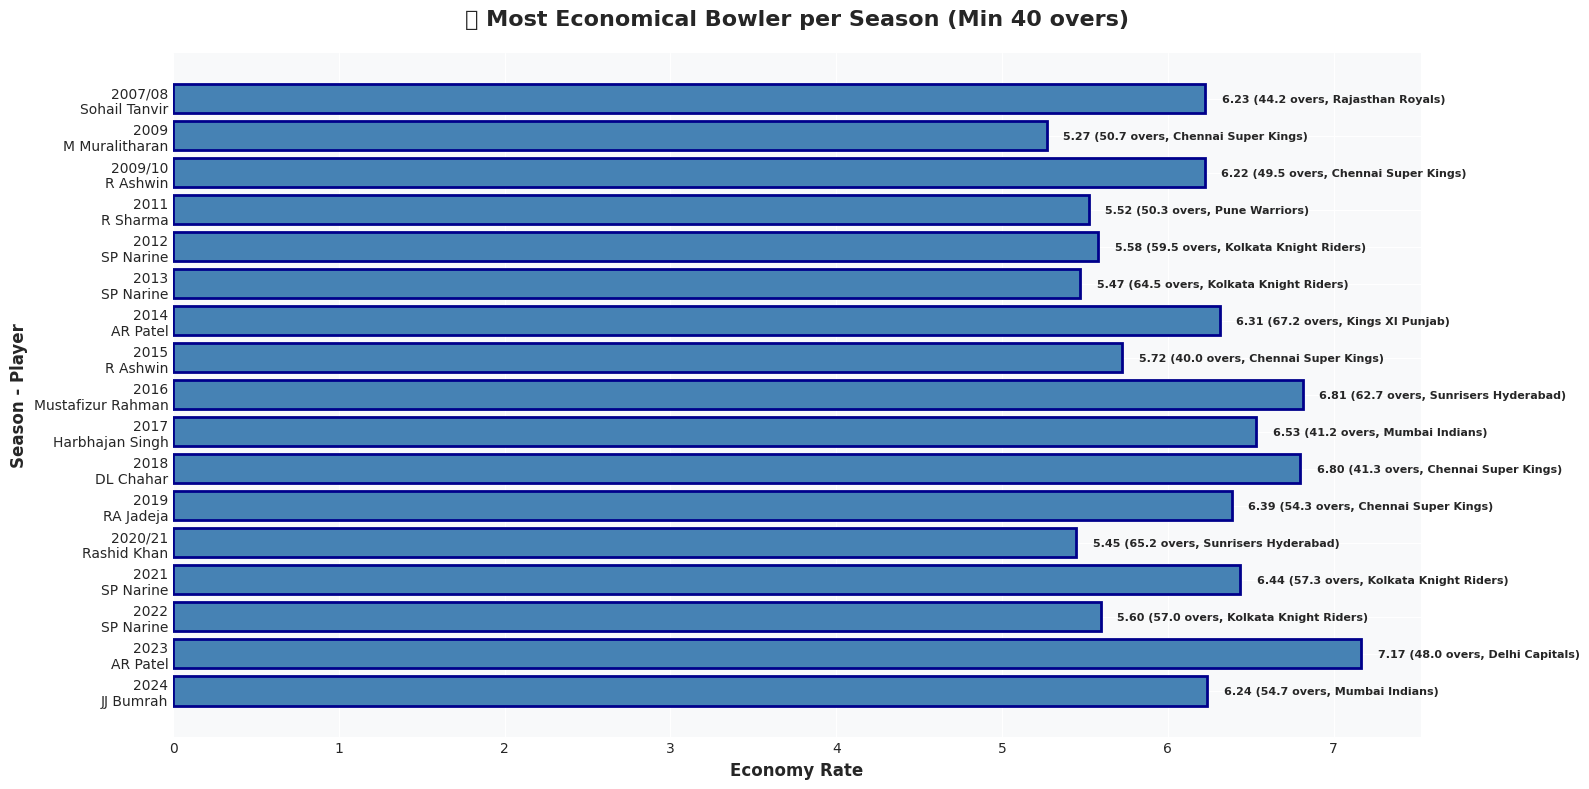

In [36]:
# 15. Most Economical Bowler per Season (min 40 overs bowled)
print("\n" + "="*80)
print("🎯 MOST ECONOMICAL BOWLER PER SEASON (Min 40 overs)")
print("="*80)

# Calculate runs conceded and balls bowled
season_economy = deliveries_with_season.groupby(['season', 'bowler']).agg({
    'total_runs': 'sum',  # runs conceded
    'ball': 'count'  # balls bowled
}).reset_index()
season_economy.columns = ['season', 'bowler', 'runs_conceded', 'balls_bowled']

# Calculate overs bowled and economy rate
season_economy['overs_bowled'] = season_economy['balls_bowled'] / 6
season_economy['economy_rate'] = season_economy['runs_conceded'] / season_economy['overs_bowled']

# Filter bowlers with at least 40 overs
season_economy_filtered = season_economy[season_economy['overs_bowled'] >= 40]

# Get most economical bowler for each season
most_economical = season_economy_filtered.loc[season_economy_filtered.groupby('season')['economy_rate'].idxmin()].reset_index(drop=True)

# Get team
most_economical['team'] = most_economical.apply(lambda x: get_bowler_team(x['season'], x['bowler']), axis=1)
most_economical = most_economical.sort_values('season')

print(most_economical[['season', 'bowler', 'team', 'overs_bowled', 'runs_conceded', 'economy_rate']].to_string(index=False))

# Visualize
plt.figure(figsize=(16, 8))
plt.barh(most_economical['season'].astype(str) + '\n' + most_economical['bowler'], 
         most_economical['economy_rate'], 
         color='steelblue', edgecolor='darkblue', linewidth=2)
plt.xlabel('Economy Rate', fontsize=12, fontweight='bold')
plt.ylabel('Season - Player', fontsize=12, fontweight='bold')
plt.title('🎯 Most Economical Bowler per Season (Min 40 overs)', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels
for i, (economy, overs, team) in enumerate(zip(most_economical['economy_rate'], most_economical['overs_bowled'], most_economical['team'])):
    plt.text(economy + 0.1, i, f'{economy:.2f} ({overs:.1f} overs, {team})', va='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.savefig('../reports/figures/most_economical_bowler_per_season.png', dpi=300, bbox_inches='tight')
plt.show()